## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [42]:

# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
#test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
#test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
#print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(test_features.head())


Loaded Training features dimensions: (7493, 38)
Loaded Validation features dimensions: (1841, 38)
Loaded Test features dimensions: (1830, 38)

Loaded Training labels dimensions: (7493, 1)
Loaded Validation labels dimensions: (1841, 1)

First few rows of loaded training features:
   Warengruppe_1  Warengruppe_2  Warengruppe_3  Warengruppe_4  Warengruppe_5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   Warengruppe_6  Temp_Very_Cold  Temp_Cold  Temp_Mild  Temp_Warm  ...  \
0              0               0          0          1          0  ...   
1              0               0          0          1          0  ...   
2              0 

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(10, activation='relu'),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 38)             │           152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811 (3.17 KB)

 Trainable params: 735 (2.87 KB)

 Non-trainable params: 76 (304.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [44]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=500,
                    validation_data=(validation_features, validation_labels))

Epoch 1/500


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 61957.4453 - val_loss: 12152.5771
Epoch 2/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11854.7627 - val_loss: 5747.4360
Epoch 3/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6720.5298 - val_loss: 4764.8403
Epoch 4/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5938.7485 - val_loss: 4122.5908
Epoch 5/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6825.4409 - val_loss: 3827.1016
Epoch 6/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6185.4443 - val_loss: 3698.7788
Epoch 7/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4999.3545 - val_loss: 3688.9604
Epoch 8/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5829.7344 - val_loss: 3575.6946
Epoch 9/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4969.8291 - val_loss: 3534.6328
Epoch 10/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4579.8442 - val_loss: 3674.6882
Epoch 11/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7109.5356 - val_

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [45]:
model.save("python_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

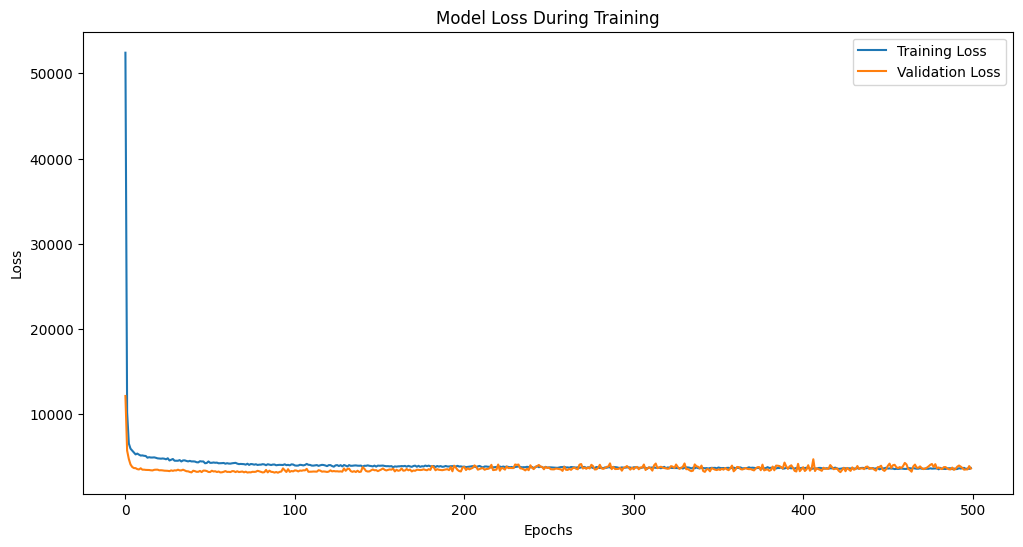

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [47]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


  1/235 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAPE on the Training Data: 21.18%
MAPE on the Validation Data: 23.16%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


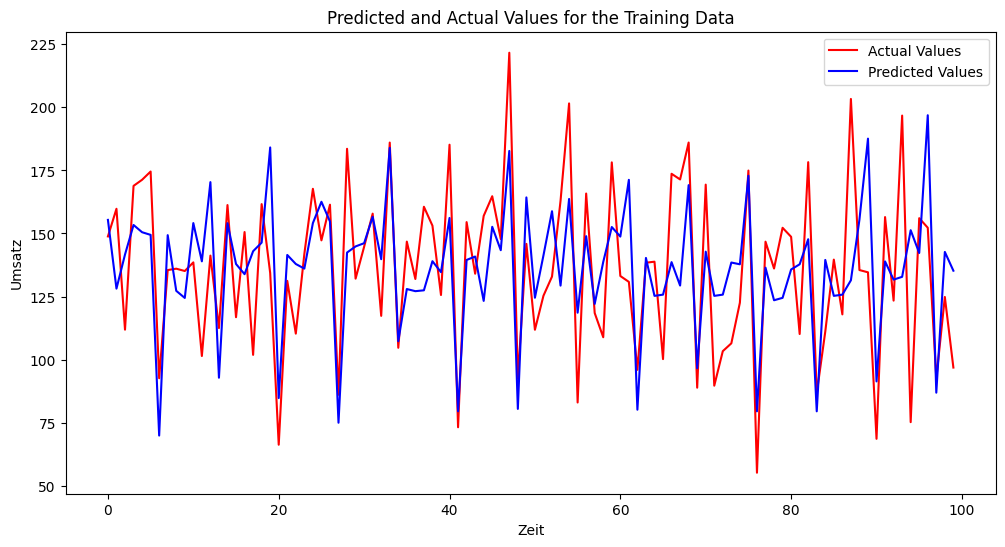

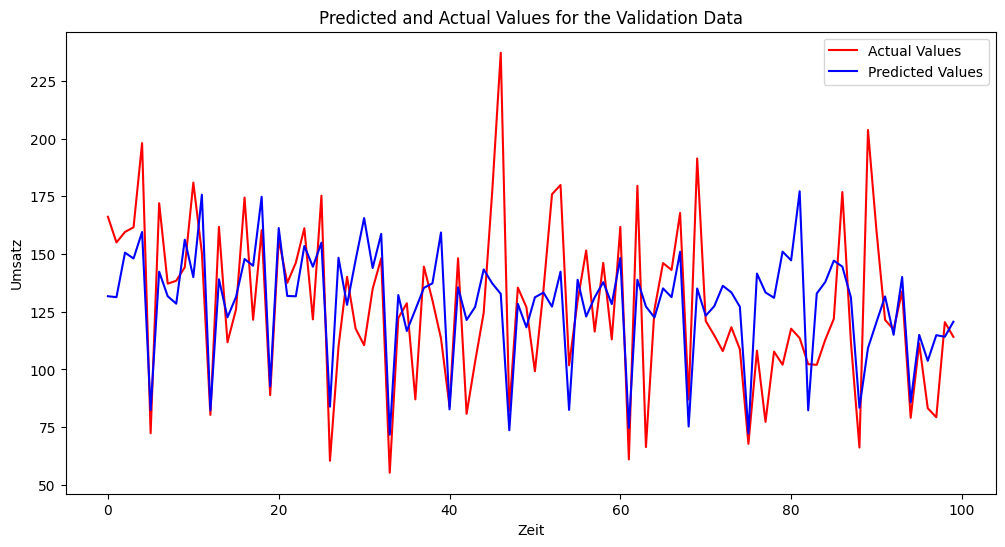

In [48]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Zeit')
    plt.ylabel('Umsatz')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [49]:
pred = model.predict(test_features)
pred = pd.DataFrame(pred)
pred

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


,0
0,126.787849
1,134.276123
2,133.572571
3,146.436768
4,82.627525
...,...
1825,81.973091
1826,84.618431
1827,58.702442
1828,73.908417


In [32]:
#Load the test-data

test_data = pd.read_csv('/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/Testdaten.csv')
# test_data['VPI'] = vpi_scaler.transform(test_data[['VPI']])
test_data

# let's merge predictions with the 'id' column:
predictions_df = pd.DataFrame({
    'id': test_data['id'].values,
    'Umsatz': pred[0].values
}).reset_index(drop=True)

predictions_df

,id,Umsatz
0,1808011,126.273369
1,1808021,138.857361
2,1808031,140.819763
3,1808041,153.141968
4,1808051,88.752426
...,...,...
1825,1812226,62.276718
1826,1812236,39.495014
1827,1812246,43.799030
1828,1812276,50.634289


In [33]:
# Speichert den DataFrame als CSV-Datei für die Kaggle-Submission
# index=False verhindert, dass eine zusätzliche Indexspalte geschrieben wird
predictions_df.to_csv('01_DNN_predictions.csv', index=False)